In [47]:
"""
@author: Anna Michalina Sawicka
@date: April 2024
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Korzystając z biblioteki pandas, wczytaj plik heart disease dataset.csv do struktury DataFrame (jest to reprezentacja tabeli)

In [48]:
# Open heart_disease_dataset.csv using pandas library
heart_disease = pd.read_csv("heart_disease_dataset.csv")


## Zadanie 1. 
Oblicz podstawowe statystyki opisowe (średnia, mediana, odchylenie standardowe) dla kolumn'Age','Resting blood pressure','Serum cholesterol in mg/dl', 'Maximum heart rate achieved'.

In [49]:
# Create a subset DataFrame with Age, Resting blood pressure, Serum cholesterol in mg/dl, Maximum heart rate achieved columns

heart_disease_subset = heart_disease[['Age','Resting blood pressure','Serum cholesterol in mg/dl','Maximum heart rate achieved']]

In [50]:
# Calculate basic statistics using describe() function and 
# Pick mean, median (50th percentile) and standard deviation using loc property

# Transpose basic_stats DataFrame for better readability using T function
basic_stats = heart_disease_subset.describe().loc[['mean', '50%', 'std']].T

# Round all values to .1 for better data readability
round(basic_stats,1)


,mean,50%,std
Age,54.4,56.0,9.1
Resting blood pressure,131.6,130.0,17.5
Serum cholesterol in mg/dl,246.0,240.0,51.6
Maximum heart rate achieved,149.1,152.0,23.0


In [51]:
# Calculate basic statistic using custom function to use less memory than describe() function

def calculate_basic_stats(x):
    return pd.Series({
        'Mean': x.mean(),
        'Median': x.median(),
        'Standard Deviation': x.std()
    })

In [52]:
heart_disease_subset2 = heart_disease[['Age','Resting blood pressure','Serum cholesterol in mg/dl','Maximum heart rate achieved']]

# Round the numbers for better readability
round(heart_disease_subset.agg(calculate_basic_stats),1).T

,Mean,Median,Standard Deviation
Age,54.4,56.0,9.1
Resting blood pressure,131.6,130.0,17.5
Serum cholesterol in mg/dl,246.0,240.0,51.6
Maximum heart rate achieved,149.1,152.0,23.0


## Zadanie 2. 
Jaki jest rozkład płci w zestawie danych? Przedstaw go na wykresie kołowym.

In [53]:
gender_distribution = heart_disease['Sex'].value_counts()
gender_distribution

Sex
male      713
female    312
Name: count, dtype: int64

In [54]:
number_male_patients = gender_distribution.loc['male']
number_female_patients = gender_distribution.loc['female']

print("In the analysed dataset, the gender distribution is " + str(number_male_patients) + " male and " + str(number_female_patients) + " female patients.")

In the analysed dataset, the gender distribution is 713 male and 312 female patients.


<Axes: ylabel='count'>

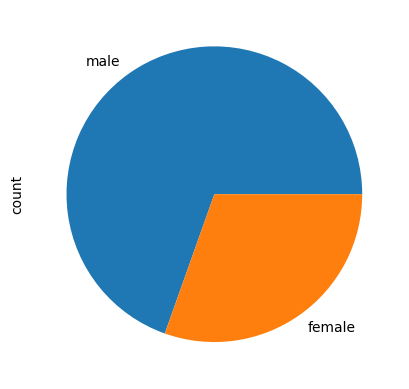

In [55]:
gender_distribution.plot(kind="pie")

## Zadanie 3. 
Czy (w analizowanej próbie) na choroby serca choruje więcej kobiet, czy mężczyzn?
O ile procent więcej?

In [56]:
heart_disease_subset3 = heart_disease[['Sex','Disease']]
heart_disease_subset3.head

<bound method NDFrame.head of          Sex  Disease
0       male    False
1       male    False
2       male    False
3       male    False
4     female    False
...      ...      ...
1020    male     True
1021    male    False
1022    male    False
1023  female     True
1024    male    False

[1025 rows x 2 columns]>

In [57]:
# Group the dataset by gender and calculates the value counts
counts_by_gender = heart_disease_subset3.groupby('Sex').value_counts()
counts_by_gender

Sex     Disease
female  True       226
        False       86
male    False      413
        True       300
Name: count, dtype: int64

In [58]:
# Calculate the number of patients who suffer more frequently from heart disease
counts_by_gender = heart_disease_subset3[heart_disease_subset3['Disease']].groupby('Sex').size()

# Check which gender suffers more frequently by returning index of the maximum element
more_frequently_suffering_gender = counts_by_gender.idxmax()

# Check number of patients in more frequently suffering group
number_patients_more_suffering = counts_by_gender.max()

# Check number of patients in less frequently suffering group
number_patients_less_suffering = counts_by_gender.min()

# Calculate a percentage difference between patients by gender
number_patients_with_heart_disease = counts_by_gender.sum()
difference_by_gender = ((number_patients_more_suffering - number_patients_less_suffering) / number_patients_with_heart_disease) * 100

### Conclusions

In [59]:

print("There is {:.2f}% more ".format(difference_by_gender) + more_frequently_suffering_gender + " patients suffering from the heart disease in the analysed dataset.")


There is 14.07% more male patients suffering from the heart disease in the analysed dataset.


## Zadanie 4
Porównaj średnią wartość cholesterolu we krwi osobno dla grupy kobiet i grupy
mężczyzn w zależności od obecności choroby serca.

In [60]:
heart_disease_subset4 = heart_disease[['Sex','Serum cholesterol in mg/dl','Disease']]
heart_disease_subset4.head(5)

,Sex,Serum cholesterol in mg/dl,Disease
0,male,212,False
1,male,203,False
2,male,174,False
3,male,203,False
4,female,294,False


In [61]:
cholesterol_by_gender_and_disease = heart_disease_subset4.groupby(['Sex','Disease']).mean()

In [62]:
cholesterol_by_gender_and_disease

Serum cholesterol in mg/dl
Sex    Disease                            
female False                    276.732558
       True                     255.641593
male   False                    245.995157
       True                     229.933333

<Axes: xlabel='Sex,Disease'>

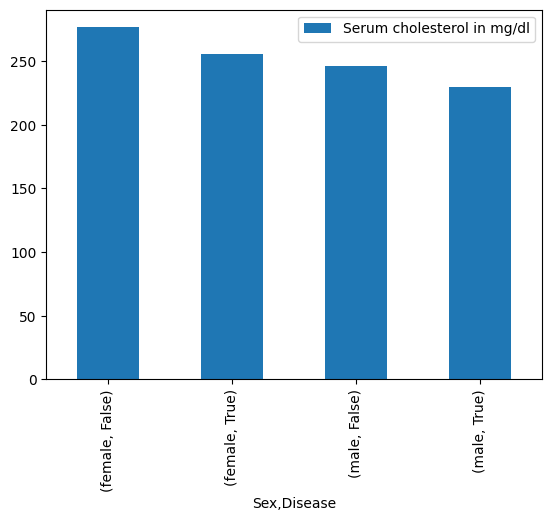

In [63]:
cholesterol_by_gender_and_disease.plot(kind="bar")

### Conlusion
The cholesterol level in serum is higher in patients without heart disease. It concerns both male and female patients.
Moreover, the cholesterol level in serum in female patients is higher than in male patients.

## Zadanie 5
Narysuj wykres pudełkowy maksymalnej osiągniętej wartości tętna podczas testu
wysiłkowego w zależności od obecności choroby serca. Co można zauważyć na pod-
stawie tego wykresu?

In [64]:
heart_disease_subset5 = heart_disease[['Maximum heart rate achieved','Disease']]
heart_disease_subset5.head(5)

,Maximum heart rate achieved,Disease
0,168,False
1,155,False
2,125,False
3,161,False
4,106,False


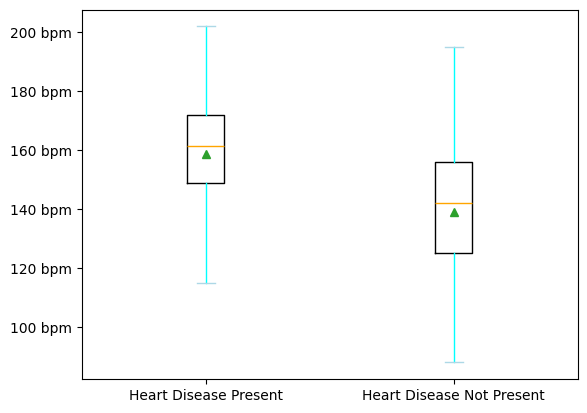

In [65]:
fig, ax = plt.subplots()

v = plt.boxplot([
    heart_disease_subset5.query("Disease == True")["Maximum heart rate achieved"],
    heart_disease_subset5.query("Disease == False")["Maximum heart rate achieved"],
],
    showmeans=True, showfliers=False,
    medianprops={"color": "orange", "linewidth": 1},
    whiskerprops={"color": "cyan", "linewidth": 1},
    capprops={"color": "lightblue", "linewidth": 1}
    
)

ax.set_xticklabels(['Heart Disease Present', 'Heart Disease Not Present'])
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d bpm'))

plt.show()

### Conlusion
Maximum heart rate achieved is higher in patients with the heart disease present comparing to those without the heart disease.

## Zadanie 6
Narysuj wykres słupkowy częstości występowania choroby serca w zależności od
informacji, czy u pacjenta występuje ból dławicowy podczas testu wysiłkowego. Co można zauważyć na podstawie wykresu?

In [66]:
heart_disease_subset6 = heart_disease[["Exercise induced angina", "Disease"]]
heart_disease_subset6

,Exercise induced angina,Disease
0,False,False
1,True,False
2,True,False
3,False,False
4,False,False
...,...,...
1020,True,True
1021,True,False
1022,True,False
1023,False,True


In [67]:
exercise_angina = heart_disease_subset6.query("`Exercise induced angina` == True")
exercise_angina

,Exercise induced angina,Disease
1,True,False
2,True,False
7,True,False
9,True,False
11,True,False
...,...,...
1015,True,False
1017,True,False
1020,True,True
1021,True,False


In [68]:
disease_counts = exercise_angina.value_counts()
disease_counts

Exercise induced angina  Disease
True                     False      274
                         True        71
Name: count, dtype: int64

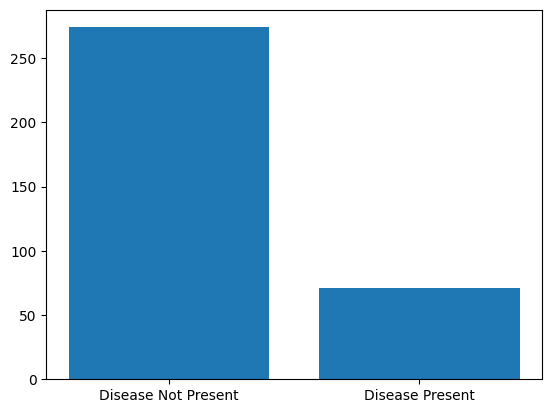

In [69]:
disease_counts_index = disease_counts.index.tolist()

x = (np.transpose(disease_counts_index)[1]).astype(int)
y = exercise_angina.value_counts().values

fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_xticks(x, list(map(lambda v: "Disease Present" if v == 1 else "Disease Not Present", x)))

plt.show()

## Wnioski

### Wniosek 1
W badanej grupie, poziom choresterolu w surowicy krwi u kobiet jest wyższy niż u mężczyzn, niezależnie od tego czy były chore czy nie.

Tę konkluzję potwierdzają wyniki badań naukowych opublikowanych przez Prasad Tharu B, Tsokos CP. A Statistical Study of Serum Cholesterol Level by Gender and Race. J Res Health Sci. 2017 Jul 25;17(3):386. PMCID: PMC7189954. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7189954/

Co zaskakujące, poziom choresterolu jest wyższy w osób zdrowych niż u osób chorych, niezależnie od płci.



### Wniosek 2
